<a href="https://colab.research.google.com/github/Kwannn666/GAN_AI/blob/main/GAN_CrossEntropy_KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主題二：研究 GAN 背後原理 - Cross Entropy & KL Divergence

## 1. Cross Entropy 和 KL Divergence 基本概念

- **交叉熵 (Cross Entropy)**：用於衡量兩個機率分佈之間的相似度，特別是在分類問題中常見。
- **KL 散度 (Kullback-Leibler Divergence)**：用來衡量一個分佈相對於另一個分佈的資訊損失。
- **GAN 應用**：GAN 的損失函數通常基於交叉熵來訓練判別器。

## 2. 數學定義

### 交叉熵 (Cross Entropy)
給定真實分佈$ ( P ) $和模型分佈$ ( Q )$，交叉熵定義如下：

$ [ H(P, Q) = - \sum_{x} P(x) \log Q(x) ] $

在機器學習中，對於二元分類問題：

$[ H(P, Q) = - (y \log \hat{y} + (1 - y) \log (1 - \hat{y})) ]$

### KL 散度 (Kullback-Leibler Divergence)
KL 散度用於測量兩個機率分佈之間的相對熵：

$[ D_{KL}(P || Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)} ]$

KL 散度越大，表示兩個分佈差異越大。

---


Cross Entropy: 0.9891
KL Divergence: 0.0458


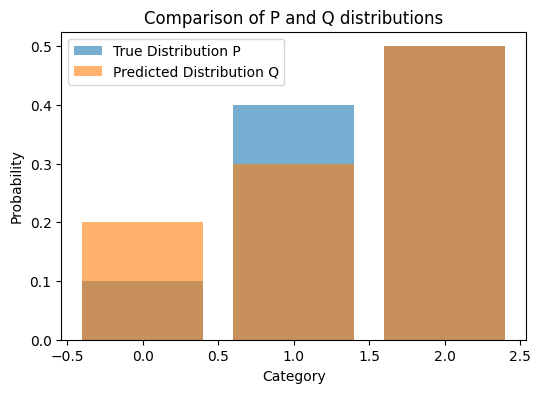

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# 定義真實分佈 P 和模型分佈 Q
P = np.array([0.1, 0.4, 0.5])  # 真實分佈
Q = np.array([0.2, 0.3, 0.5])  # 預測分佈

# 計算 Cross Entropy
cross_entropy = -np.sum(P * np.log(Q))

# 計算 KL Divergence
kl_divergence = np.sum(P * np.log(P / Q))

print(f"Cross Entropy: {cross_entropy:.4f}")
print(f"KL Divergence: {kl_divergence:.4f}")

# 可視化 P 和 Q 的分佈
plt.figure(figsize=(6,4))
plt.bar(range(len(P)), P, alpha=0.6, label="True Distribution P")
plt.bar(range(len(Q)), Q, alpha=0.6, label="Predicted Distribution Q")
plt.legend()
plt.xlabel("Category")
plt.ylabel("Probability")
plt.title("Comparison of P and Q distributions")
plt.show()


## 3. 交叉熵與 KL 散度的比較

- **交叉熵** 衡量真實分佈與預測分佈的相似程度。
- **KL 散度** 測量從 P 變為 Q 的資訊損失，若 Q = P，則 KL 散度為 0。
- 在機器學習應用中，交叉熵更常用於分類問題，而 KL 散度則常見於機率分佈學習。

## 4. 在 GAN 中的應用

在 GAN (生成對抗網路) 中：
- **生成器 (Generator)** 嘗試讓 \( G(z) \) 生成的樣本接近真實樣本，使得判別器無法區分。
- **判別器 (Discriminator)** 使用 **交叉熵損失** 來判斷輸入是真實數據或生成數據。

GAN 的目標函數：

$[ \min_G \max_D \mathbb{E}_{x \sim p_{data}}[\log D(x)] + \mathbb{E}_{z \sim p_{z}}[\log(1 - D(G(z)))] ]$

---


In [ ]:
import torch
import torch.nn.functional as F

# 假設真實標籤 y = 1 (真實數據), 預測 D(x) = 0.8
y_real = torch.tensor([1.0])
y_pred_real = torch.tensor([0.8])
loss_real = F.binary_cross_entropy(y_pred_real, y_real)

# 假設生成數據標籤 y = 0, 預測 D(G(z)) = 0.3
y_fake = torch.tensor([0.0])
y_pred_fake = torch.tensor([0.3])
loss_fake = F.binary_cross_entropy(y_pred_fake, y_fake)

# 判別器的總損失
D_loss = loss_real + loss_fake

print(f"判別器的交叉熵損失: {D_loss.item():.4f}")


判別器的交叉熵損失: 0.5798


## 5. 結論與實驗結果

- **交叉熵** 和 **KL 散度** 皆用於機率分佈的衡量，GAN 訓練時常使用交叉熵作為損失函數。
- **KL 散度** 主要用於機率密度估計，衡量兩個分佈的差異。
- **GAN 的判別器** 透過最小化交叉熵來學習如何區分真實數據與生成數據。
